# 🔥 Prognozowanie emisji CO - starter4 ⭐ 


Dodajmy tym razem logarytm.


## ✔️ Wczytujemy potrzebne biblioteki 

In [33]:
import pandas as pd
import numpy as np

import xgboost as xgb
import eli5

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold, StratifiedKFold, train_test_split

## 💾 Wczytujemy dane

In [34]:
df_train = pd.read_hdf("../input/train_power_plant.h5")
df_test = pd.read_hdf("../input/test_power_plant.h5")

df_all = pd.concat([df_train, df_test], axis=0)

df_all.shape

(36733, 12)

## Rozkład
Sprawdźmy jak wygląda rozkład zmiennej docelowej.

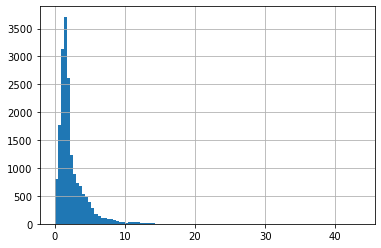

In [35]:
df_all["CO"].hist(bins=100);

Widać, że rozkład jest skośny, zobaczmy na ile pomoże transformacja logarytmiczna (najpierw zobaczmy to wizualnie).

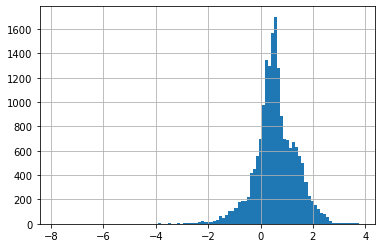

In [36]:
np.log( df_all["CO"] ).hist(bins=100);

Widać że teraz jest lepiej (rozkład wygląda symetrycznie).

## ⚙️Tworzymy cechy

In [45]:
def feature_engineering(df, par1, par2):
    df['{0}&{1}'.format(par1, par2)] = df[par1].map(float) + df[par2].map(float)
    
    return df
    
df_all = feature_engineering(df_all,'TIT', 'TAT')
df_all = feature_engineering(df_all, 'AT', 'AH')
df_all = feature_engineering(df_all, 'AFDP', 'NOX')
df_all = feature_engineering(df_all, 'GTEP', 'TAT')

## 💪 Przygotowujemy `X` i `y` 


In [46]:
feats = ['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP','NOX', 'TIT&TAT', 'AT&AH', 'AFDP&NOX', 'GTEP&TAT']

df_train = df_all[ df_all["CO"].notnull() ]
df_test = df_all[ df_all["CO"].isnull() ].copy()


X_train = df_train[feats].values
y_train = df_train["CO"].values
y_train_log = np.log(y_train)

X_test = df_test[feats].values

## 🤖 Trenujemy i prognozujemy 

Tutaj używamy już bardziej zaawansowanego modelu ` xgb.XGBRegressor`. Zobacz, jaki wynik nam daje. 

In [47]:
xgb_params = {
    'colsample_bytree' : 0.8007029117993822,
    'learning_rate' : 0.050320135179658776,
    'max_depth' : 18, 
    'min_child_weight' : 4, 
    'random_state' : 6800, 
    'reg_alpha' : 1.0562173674403486, 
    'reg_lambda' : 0.8587059408628918, 
    'subsample' : 0.8050906085153493,
    'n_estimators' : 300
}

model = xgb.XGBRegressor(**xgb_params)
model.fit(X_train, y_train_log)
y_pred_log = model.predict(X_test)
y_pred = np.exp(y_pred_log)

df_test["CO"] = y_pred

## 👀 Sprawdzamy ważność cech

In [48]:
eli5.show_weights(model, feature_names=feats)

Weight,Feature
0.4819,TIT
0.1097,CDP
0.0733,TIT&TAT
0.0664,GTEP&TAT
0.0503,TEY
0.0357,NOX
0.0335,AFDP&NOX
0.0314,AFDP
0.0233,AT
0.0228,GTEP


## ✔️ Zapisujemy wynik i dodajemy na Kaggle

In [ ]:
!mkdir -p ../output

In [49]:
df_test[ ["id", "CO"] ].to_csv("../output/xgb_log2.csv", index=False)

### 🌎 [Dołącz](https://www.kaggle.com/t/fe9bea7432de4d21941ea721ddad230e) do konkursu jeszcze dziś! 


### 🤝🗣️ Współpraca 💪 i komunikacja 💬

👉 [#pml_konkurs](https://practicalmlcourse.slack.com/archives/C036J6JSP40) - to jest miejsce, gdzie można szukać pomocy i dzielić się doświadczeniem, także pomagać innym 🥰. 





